In [2]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy import optimize as opt
import sympy as sy

In [3]:
P,P_b,P_u,E,E_b,E_u,S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z = sy.symbols("P,P_b,P_u,E,E_b,E_u,S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z")

dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E
dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
dP_udt = a*P_b - g*(A_p/A_e)*P_u
dEdt = g*(A_p/A_e)*P_u + b*E_u + j*E_b - (k/W)*S*E - f*(A_e/A_p)*E
dE_bdt = (k/W)*S*E - j*E_b - a*E_b
dE_udt = a*E_b - b*E_u - z*E_u
dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))
dydt = [dPdt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt, dSdt]

sol = sy.solvers.solve([dPdt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt],[P,P_b,P_u,E,E_b,E_u])
print('    P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:',sol[P])
print('    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:',sol[P_b])
print('    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:',sol[P_u])
print('    E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:',sol[E])
print('    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:',sol[E_b])
print('    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:',sol[E_u])

    P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S*a**2*k*z)
    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_p**2*S*a*g*k*z)
    E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (W*a*b*y + W*a*y*z + W*b*j*y + W*j*y*z)/(S*a*k*z)
    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (b*y + y*z)/(a*z)
    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: y/z


In [4]:
P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S*a**2*k*z)
P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_p**2*S*a*g*k*z)
E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (W*a*b*y + W*a*y*z + W*b*j*y + W*j*y*z)/(S*a*k*z)
E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (b*y + y*z)/(a*z)
E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: y/z

/var/folders/8v/664f0v810js5hmb27xj96f040000gn/T/ipykernel_11270/2493949149.py:1: RuntimeWarning: divide by zero encountered in divide
  P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
/var/folders/8v/664f0v810js5hmb27xj96f040000gn/T/ipykernel_11270/2493949149.py:4: RuntimeWarning: divide by zero encountered in divide
  E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (W*a*b*y + W*a*y*z + W*b*j*y + W*j*y*z)/(S*a*k*z)
/var/folders/8v/664f0v810js5hmb27xj96f040000gn/T/ipykernel_11270/1608769074.py:1: RuntimeWarning: invalid value encountered in multiply
  dSdt = lambda S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z: -(k/W)*S*((A_p/V)*P(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)+(A_e/V)*E(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)) + (j+a)*

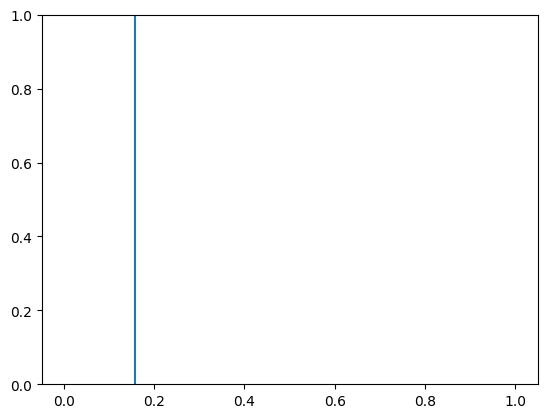

In [14]:
dSdt = lambda S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z: -(k/W)*S*((A_p/V)*P(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)+(A_e/V)*E(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)) + (j+a)*((A_p/V)*P_b(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)+(A_e/V)*E_b(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)) - (v_m*S)/(V*(K_m+S))
S = np.linspace(0,1,1000)

#Defining Variables
A_e = 47
A_p = 314
a = 1
b = 1
f = .1
g = .1
j = 10**2
K_m = 2.5
K_d = .74
k = j/K_d
y = .000083
W = 32
v_m = 8.8 * 10**3
V = 523
z = .002

S_e = 0.1

S_steady = opt.bisect() dSdt(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)
plt.plot(S,dSdt(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z))
plt.show()

In [6]:
#Defining Variables
A_e = 47
A_p = 314
a = 1
b = 1
f = .1
g = .1
j = 10**2
K_m = 2.5
K_d = .74
k = j/K_d
y = .000083
W = 32
v_m = 8.8 * 10**3
V = 523
z = .002

0.17579537521384783


/var/folders/8v/664f0v810js5hmb27xj96f040000gn/T/ipykernel_47751/4189766811.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


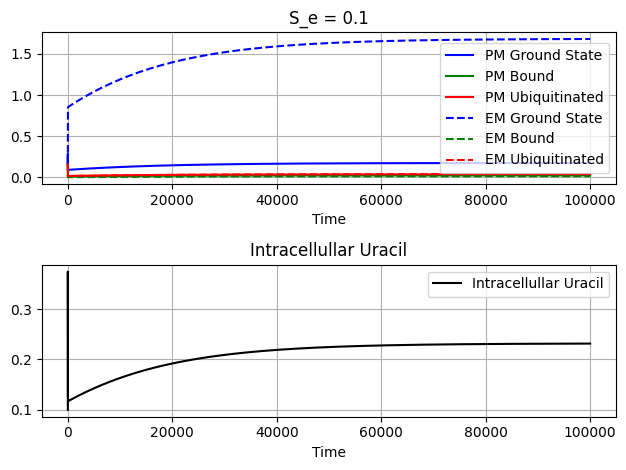

In [27]:
#Defining ODE 
def func(FM,t,a,A_e,A_p,b,f,g,j,k,K_m,S_e,v_m,V,W,y,z):
    P,P_b,P_u,E,E_b,E_u,S = FM
    dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dEdt = b*E_u + j*E_b - (k/W)*S*E - f*(A_e/A_p)*E
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = g*(A_p/A_e)*P_u + a*E_b - b*E_u - z*E_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))
    dydt = [dPdt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt, dSdt]
    return dydt

y0 = [1/6,1/6,1/6,1/6,1/6,1/6,0.1]
num = int(1e5)
t = np.linspace(0,num,10*num)
#Defining Extracellular Uracil
S_e = 0.1
#Defining subplot
plt1 = plt.subplot(int(f"211"))
#Finding solution to ODE
sol = odeint(func,y0,t,args = (a,A_e,A_p,b,f,g,j,k,K_m,S_e,v_m,V,W,y,z))
#Plotting solution
plt1.plot(t,sol[:,0],'b',label = "PM Ground State")
plt1.plot(t,sol[:,1],'g',label = "PM Bound")
plt1.plot(t,sol[:,2],'r',label = "PM Ubiquitinated")
plt1.plot(t,sol[:,3],'b--',label = "EM Ground State")
plt1.plot(t,sol[:,4],'g--',label = "EM Bound")
plt1.plot(t,sol[:,5],'r--',label = "EM Ubiquitinated")
plt1.set_xlabel("Time")
plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t,sol[:,6],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time")
plt2.set_title("Intracellullar Uracil")
#Setting graph layout
plt.legend()
plt.grid()
plt1.set_xlabel("Time")
print(sol[:,0][-1])


plt.tight_layout()
plt.show()

0.01804520243343034


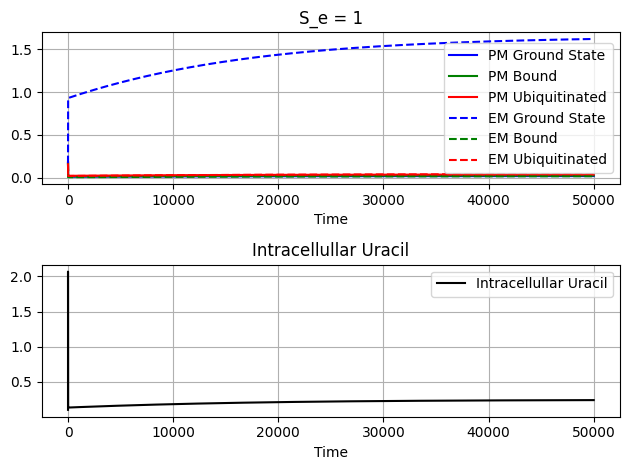

In [21]:
#Defining ODE 
def func(FM,t,a,A_e,A_p,b,f,g,j,k,K_m,S_e,v_m,V,W,y,z):
    P,P_b,P_u,E,E_b,E_u,S = FM
    dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dEdt = b*E_u + j*E_b - (k/W)*S*E - f*(A_e/A_p)*E
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = g*(A_p/A_e)*P_u + a*E_b - b*E_u - z*E_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))
    dydt = [dPdt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt, dSdt]
    return dydt

#Defining Initial Condition, Timespan, and rates to test
y0 = [1/6,1/6,1/6,1/6,1/6,1/6,0.1]
rates = [.5,.7,1,5,10,20]
rates = [1]
t = np.linspace(0,50000,100000)

n=1
#Going through each rate
for i in range(n):
    #Defining Extracellular Uracil
    S_e = rates[i]
    #Defining subplot
    plt1 = plt.subplot(int(f"2{n}{i+1}"))
    #Finding solution to ODE
    sol = odeint(func,y0,t,args = (a,A_e,A_p,b,f,g,j,k,K_m,S_e,v_m,V,W,y,z))
    #Plotting solution
    plt1.plot(t,sol[:,0],'b',label = "PM Ground State")
    plt1.plot(t,sol[:,1],'g',label = "PM Bound")
    plt1.plot(t,sol[:,2],'r',label = "PM Ubiquitinated")
    plt1.plot(t,sol[:,3],'b--',label = "EM Ground State")
    plt1.plot(t,sol[:,4],'g--',label = "EM Bound")
    plt1.plot(t,sol[:,5],'r--',label = "EM Ubiquitinated")
    plt1.set_xlabel("Time")
    plt.legend()
    plt.grid()
    plt1.set_title(f"S_e = {S_e}")
    plt2 = plt.subplot(int(f"2{n}{i+1+n}"))
    plt2.plot(t,sol[:,6],'k',label = "Intracellullar Uracil")
    plt2.set_xlabel("Time")
    plt2.set_title("Intracellullar Uracil")
    #Setting graph layout
    plt.legend()
    plt.grid()
    plt1.set_xlabel("Time")
    print(sol[:,0][-1])


plt.tight_layout()
plt.show()